In [1]:
import pandas as pd
from collections import Counter

In [2]:
final_topics = pd.read_csv("../data/final_review_sentence_topics.csv")

In [3]:
final_topics.head(10)

,index,review,abae_topic_label,abae_topic_name,employee_status,industry,Job_Family,lda_topic_label,lda_topic_name
0,299,fluor be a great company with people that care...,4,Human Resource & Benefits,Former Employee,construction,Database Administrator,4.0,Hiring Process
1,299,management care about their employee as well a...,1,Management,Former Employee,construction,Database Administrator,4.0,Hiring Process
2,1145,fluor be the first powerhouse epc that go heav...,0,Support,Former Employee,construction,Information Technology Analyst,4.0,Hiring Process
3,1145,they send as much work overseas a possible and...,1,Management,Former Employee,construction,Information Technology Analyst,4.0,Hiring Process
4,1145,this be a heavy load company with management,1,Management,Former Employee,construction,Information Technology Analyst,4.0,Hiring Process
5,1145,fluor chase the big project and will hire thou...,0,Support,Former Employee,construction,Information Technology Analyst,4.0,Hiring Process
6,1145,in turn they will lay off thousand when it go,0,Support,Former Employee,construction,Information Technology Analyst,4.0,Hiring Process
7,1145,fluor have the sharp spike in hiring and lay off,4,Human Resource & Benefits,Former Employee,construction,Information Technology Analyst,4.0,Hiring Process
8,1145,the employee be clearly not their great asset,4,Human Resource & Benefits,Former Employee,construction,Information Technology Analyst,4.0,Hiring Process
9,1375,there be not much that i could add here,0,Support,Current Employee,construction,Software/Application Developer,5.0,Environment & Culture


In [4]:
final_data = pd.read_csv("../data/final_review_topics.csv")

In [5]:
final_data

,index,lda_topic_label,lda_topic_name,employee_status,industry,Job_Family,rating
0,299,4.0,Hiring Process,Former Employee,construction,Database Administrator,4.0
1,1145,4.0,Hiring Process,Former Employee,construction,Information Technology Analyst,3.0
2,1375,5.0,Environment & Culture,Current Employee,construction,Software/Application Developer,5.0
3,1874,4.0,Hiring Process,Current Employee,construction,Cloud Computing Engineers,4.0
4,2136,4.0,Hiring Process,Current Employee,construction,Software/Application Developer,3.0
...,...,...,...,...,...,...,...
45246,2587574,5.0,Environment & Culture,Current Employee,hospital_care,Software/Application Developer,4.0
45247,2587575,0.0,Collaborative Environment,Former Employee,hospital_care,Software/Application Developer,4.0
45248,2587583,3.0,Technical Skills,Former Employee,hospital_care,Software/Application Developer,5.0
45249,2587643,0.0,Collaborative Environment,Current Employee,hospital_care,Computer Support Specialist,5.0


In [6]:
from collections import Counter
lda_labels = [
    "Hiring Process",
"Environment & Culture",         
"Learning & Development",         
"Collaborative Environment",      
"Technical Skills" ,              
"Growth Opportunities",           
"Job Security & Compensation"    
]
abae_topic_labels = final_topics.abae_topic_name.tolist()
lda_topic_labels = final_topics.lda_topic_name.tolist()


labels = lda_labels
labels.extend(list(set(abae_topic_labels)))

sequence = Counter()
sequence_labels = Counter()
for l, a in zip(lda_topic_labels, abae_topic_labels):
    
    l_idx = labels.index(l)
    a_idx = labels.index(a)
    
    sequence[(l_idx,a_idx)] += 1
    sequence_labels[(l,a)] += 1

In [7]:
import plotly.express as px

px_colors = px.colors.qualitative.Plotly[:8]

source = []
target = []
value = []
line_colors = []
for seq, ct in sequence.items():
    source.append(seq[0])
    target.append(seq[1])
    value.append(ct)
    line_colors.append(px_colors[seq[0]])
    

In [8]:
import plotly.graph_objects as go
import plotly.offline as pyo

pyo.init_notebook_mode()
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
    ),
    link = dict(
      source = source, # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = target,
      value = value,
        color = line_colors
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [24]:
import numpy as np
sequence_labels = dict(sorted(sequence_labels.items()))
top_seq = dict(sequence_labels)
combinations = [ (combo) for combo in top_seq.keys()]
values = list(top_seq.values())


In [25]:
sequence_labels

{('Collaborative Environment', 'Human Resource & Benefits'): 1776,
 ('Collaborative Environment', 'Management'): 7401,
 ('Collaborative Environment', 'Support'): 3596,
 ('Collaborative Environment', 'Technical Skills'): 3426,
 ('Collaborative Environment', 'Work Life'): 3226,
 ('Environment & Culture', 'Human Resource & Benefits'): 5684,
 ('Environment & Culture', 'Management'): 13563,
 ('Environment & Culture', 'Support'): 1623,
 ('Environment & Culture', 'Technical Skills'): 5006,
 ('Environment & Culture', 'Work Life'): 6423,
 ('Growth Opportunities', 'Human Resource & Benefits'): 1281,
 ('Growth Opportunities', 'Management'): 1648,
 ('Growth Opportunities', 'Support'): 637,
 ('Growth Opportunities', 'Technical Skills'): 3307,
 ('Growth Opportunities', 'Work Life'): 613,
 ('Hiring Process', 'Human Resource & Benefits'): 12248,
 ('Hiring Process', 'Management'): 10487,
 ('Hiring Process', 'Support'): 8556,
 ('Hiring Process', 'Technical Skills'): 4452,
 ('Hiring Process', 'Work Life'

In [12]:
sequence_labels = {('Hiring Process', 'Human Resource & Benefits'): 12248,
 ('Hiring Process', 'Management'): 10487,
 ('Hiring Process', 'Support'): 8556,
 ('Hiring Process', 'Technical Skills'): 4452,
 ('Hiring Process', 'Work Life'): 8244,
  ('Environment & Culture', 'Human Resource & Benefits'): 5684,
 ('Environment & Culture', 'Management'): 13563,
 ('Environment & Culture', 'Support'): 1623,
 ('Environment & Culture', 'Technical Skills'): 5006,
 ('Environment & Culture', 'Work Life'): 6423,
 ('Learning & Development', 'Human Resource & Benefits'): 2140,
 ('Learning & Development', 'Management'): 7858,
 ('Learning & Development', 'Support'): 1235,
 ('Learning & Development', 'Technical Skills'): 9414,
 ('Learning & Development', 'Work Life'): 4562,
('Collaborative Environment', 'Human Resource & Benefits'): 1776,
 ('Collaborative Environment', 'Management'): 7401,
 ('Collaborative Environment', 'Support'): 3596,
 ('Collaborative Environment', 'Technical Skills'): 3426,
 ('Collaborative Environment', 'Work Life'): 3226,
('Technical Skills', 'Human Resource & Benefits'): 465,
 ('Technical Skills', 'Management'): 2628,
 ('Technical Skills', 'Support'): 5944,
 ('Technical Skills', 'Technical Skills'): 2557,
 ('Technical Skills', 'Work Life'): 383,
 ('Growth Opportunities', 'Human Resource & Benefits'): 1281,
 ('Growth Opportunities', 'Management'): 1648,
 ('Growth Opportunities', 'Support'): 637,
 ('Growth Opportunities', 'Technical Skills'): 3307,
 ('Growth Opportunities', 'Work Life'): 613,
 
 ('Job Security & Compensation', 'Human Resource & Benefits'): 2517,
 ('Job Security & Compensation', 'Management'): 1862,
 ('Job Security & Compensation', 'Support'): 828,
 ('Job Security & Compensation', 'Technical Skills'): 1428,
 ('Job Security & Compensation', 'Work Life'): 1410
 
}

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def plot_stacked_bar(data, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", x_label=None, 
                     colors=None, reverse=False):
    

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        axes.append(plt.barh(ind, row_data, left=cum_size, 
                            label=series_labels[i], color=color))
        
        cum_size += row_data

    if category_labels:
        plt.yticks(ind, category_labels,fontsize=20)

    if x_label:
        plt.xlabel(x_label,fontsize=20)

    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left',fontsize=30)

   

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(w), ha="center", 
                         va="center")

In [14]:
abae_topic_list = list(set(abae_topic_labels))
lda_topic_list = list(set(lda_topic_labels))
abae_topic_list.sort()
lda_topic_list.sort()

In [15]:

life = [sequence_labels[k] for k in sequence_labels.keys() if k[1] == 'Work Life']
skill  = [sequence_labels[k] for k in sequence_labels.keys() if k[1] == 'Technical Skills']
management  = [sequence_labels[k] for k in sequence_labels.keys() if k[1] == 'Management']
support = [sequence_labels[k] for k in sequence_labels.keys() if k[1] == 'Support']
HR  = [sequence_labels[k] for k in sequence_labels.keys() if k[1] == 'Human Resource & Benefits']

In [16]:
data = [HR,management,support,skill,life]

In [17]:
data

[[12248, 5684, 2140, 1776, 465, 1281, 2517],
 [10487, 13563, 7858, 7401, 2628, 1648, 1862],
 [8556, 1623, 1235, 3596, 5944, 637, 828],
 [4452, 5006, 9414, 3426, 2557, 3307, 1428],
 [8244, 6423, 4562, 3226, 383, 613, 1410]]

In [18]:
topic_sum = [sum(i) for i in zip(*data)]

In [19]:
topic_sum

[43987, 32299, 25209, 19425, 11977, 7486, 8045]

In [20]:
sub_topic=[]
for i in range(5):
    sub_topic.append([np.round(data[i][idx]*100/topic_sum[idx],2) for idx in range(7)])

In [21]:
sub_topic

[[27.84, 17.6, 8.49, 9.14, 3.88, 17.11, 31.29],
 [23.84, 41.99, 31.17, 38.1, 21.94, 22.01, 23.14],
 [19.45, 5.02, 4.9, 18.51, 49.63, 8.51, 10.29],
 [10.12, 15.5, 37.34, 17.64, 21.35, 44.18, 17.75],
 [18.74, 19.89, 18.1, 16.61, 3.2, 8.19, 17.53]]

In [25]:
sub_topic = [[23.84, 41.97, 31.17, 38.1, 21.94, 21.64, 23.16],
 [10.12, 15.56, 37.33,17.63, 21.35, 44.63,17.75],
 [27.84, 17.6, 8.5, 9.1, 3.88, 17.07, 31.27],
 [19.45, 5.02, 4.89, 18.51, 49.63, 8.59, 10.3],
 [18.74, 19.84, 18.11, 16.61, 3.2, 8.08, 17.52]]

In [26]:
lda_topic_list= [ 'Hiring Process', 'Environment & Culture','Learning & Development','Collaborative Environment',
                 'Technical Skills',

 'Growth Opportunities',

 'Job Security & Compensation',
 
 ]

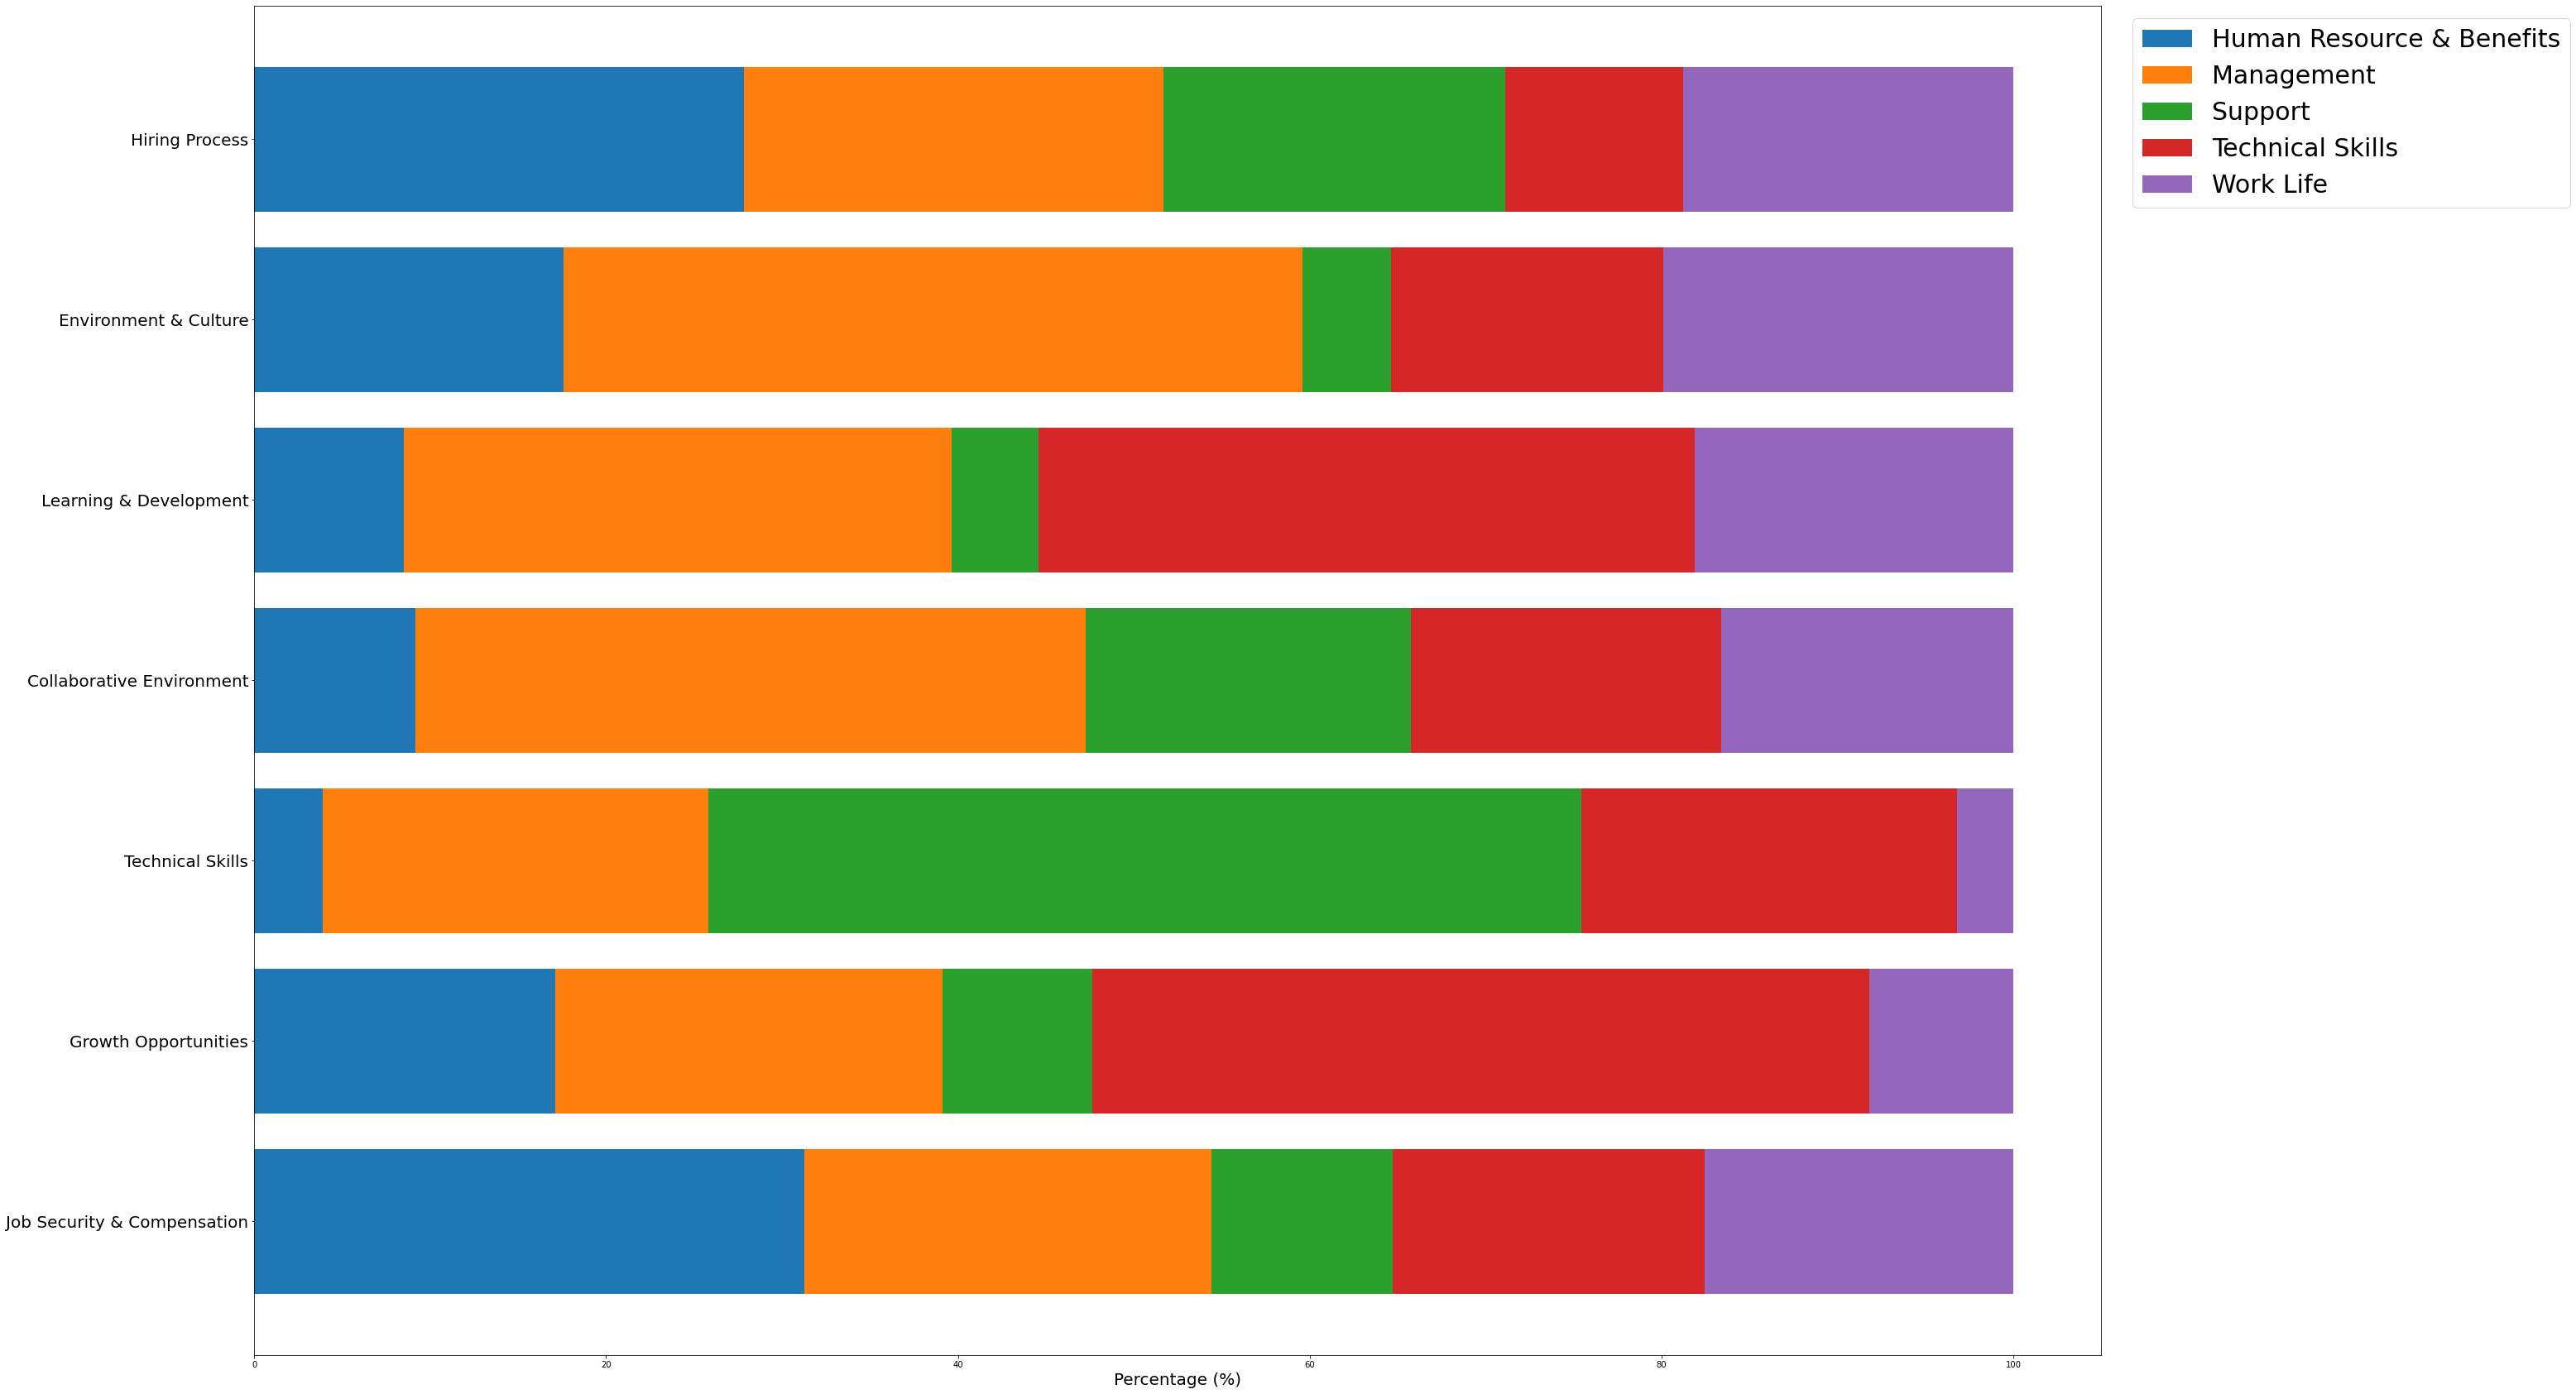

In [38]:
plt.figure(figsize=(40,30))
plot_stacked_bar(
    sub_topic, 
    abae_topic_list, 
    category_labels=lda_topic_list, 
     
    reverse=True,   
    x_label="Percentage (%)"
)

plt.savefig('../results/topic_ptc.png', format='png', dpi=300,bbox_inches="tight")
plt.show()


In [39]:
IT = ['IT_services','computer_software']
non_IT_industry = ['accounting','automotive','construction','education_management',
                  'financial','higher_ed','hospital_care','retail']

In [40]:
final_data=final_data.assign(Industry_cat = lambda v: v.industry.apply(lambda x: 'IT Industry' if x in IT  else 'Non IT Industry'))


In [41]:
final_data.groupby(['lda_topic_name','Industry_cat']).size()

lda_topic_name               Industry_cat   
Collaborative Environment    IT Industry        3537
                             Non IT Industry    1937
Environment & Culture        IT Industry        8163
                             Non IT Industry    2584
Growth Opportunities         IT Industry        1889
                             Non IT Industry     851
Hiring Process               IT Industry        6539
                             Non IT Industry    4854
Job Security & Compensation  IT Industry        2365
                             Non IT Industry     190
Learning & Development       IT Industry        7378
                             Non IT Industry    1597
Technical Skills             IT Industry        2049
                             Non IT Industry    1318
dtype: int64

In [42]:
employee_status_count= final_data.groupby(['lda_topic_name','employee_status']).size().to_frame(name='employee_status_count').groupby(level=1).apply(lambda x:
                                                 np.round(100 * x / float(x.sum()),2)).pivot_table(values=['employee_status_count']
                                                                                                                   ,columns='lda_topic_name',index=['employee_status'])


In [43]:
employee_status_count

employee_status_count                        \
lda_topic_name   Collaborative Environment Environment & Culture   
employee_status                                                    
Current Employee                     11.17                 26.61   
Former Employee                      12.90                 21.26   

                                                      \
lda_topic_name   Growth Opportunities Hiring Process   
employee_status                                        
Current Employee                 5.85          21.28   
Former Employee                  6.23          28.56   

                                                                     \
lda_topic_name   Job Security & Compensation Learning & Development   
employee_status                                                       
Current Employee                        6.99                  21.80   
Former Employee                         4.47                  18.12   

                                   
lda_topic_name   Technical Skills  
employee_status                    
Current Employee             6.29  
Former Employee              8.45

In [44]:
industry_count = final_data.groupby(['lda_topic_name','Industry_cat']).size().to_frame(name='industry_count').groupby(level=1).apply(lambda x:
                                                 np.round(100 * x / float(x.sum()),2)).pivot_table(values=['industry_count']
                                                                                                                   ,columns='lda_topic_name',index=['Industry_cat'])

In [45]:
industry_count

industry_count                        \
lda_topic_name  Collaborative Environment Environment & Culture   
Industry_cat                                                      
IT Industry                         11.08                 25.57   
Non IT Industry                     14.53                 19.38   

                                                     \
lda_topic_name  Growth Opportunities Hiring Process   
Industry_cat                                          
IT Industry                     5.92          20.49   
Non IT Industry                 6.38          36.41   

                                                                    \
lda_topic_name  Job Security & Compensation Learning & Development   
Industry_cat                                                         
IT Industry                            7.41                  23.11   
Non IT Industry                        1.43                  11.98   

                                  
lda_topic_name  Technical Skills  
Industry_cat                      
IT Industry                 6.42  
Non IT Industry             9.89

In [51]:
industry_count.columns = ['Collaborative Environment',
                          'Environment & Culture',
                          'Growth Opportunities',
                          'Hiring Process',
                          'Job Security & Compensation',
                          'Learning & Development',
                           'Technical Skills']
employee_status_count.columns = ['Collaborative Environment',
                          'Environment & Culture',
                          'Growth Opportunities',
                          'Hiring Process',
                          'Job Security & Compensation',
                          'Learning & Development',
                           'Technical Skills']

In [52]:
pd.concat([employee_status_count, industry_count]).applymap("{0:.1f}%".format)

,Collaborative Environment,Environment & Culture,Growth Opportunities,Hiring Process,Job Security & Compensation,Learning & Development,Technical Skills
Current Employee,11.2%,26.6%,5.8%,21.3%,7.0%,21.8%,6.3%
Former Employee,12.9%,21.3%,6.2%,28.6%,4.5%,18.1%,8.4%
IT Industry,11.1%,25.6%,5.9%,20.5%,7.4%,23.1%,6.4%
Non IT Industry,14.5%,19.4%,6.4%,36.4%,1.4%,12.0%,9.9%


In [53]:
abae_topic = [{"ticket": "0.55650365", "report": "0.5456349", "log": "0.5452343", "verify": "0.5440996",
                            "file": "0.5436535", "batch": "0.54315054", "manually": "0.542738", "check": "0.5424091", 
                            "document": "0.5377053", "reject": "0.53126734", "monitor": "0.53043616", "confirm": "0.5293739"
                            , "release": "0.5273294", "final": "0.52178466", "request": "0.52114344", "submit": "0.5155511",
                            "inspection": "0.5121229", "call": "0.51115316", "validate": "0.50814426", 
                            "checklist": "0.5012166", "upload": "0.49916193", "email": "0.49688524", 
                            "paperwork": "0.49592832", "submission": "0.4913098", "deliverable": "0.48777825"}, 
               {"management": "0.66616094", "work": "0.643152", "manager": "0.52198", "leadership": "0.45648164"
                            , "managing": "0.40114033", "staff": "0.38880873", "leader": "0.38844207", 
                            "cooperate": "0.3877666", "director": "0.36283463", "member": "0.33608937", 
                            "departmental": "0.33545074", "communicate": "0.3351066", "collaboration": "0.33500552",
                            "ordinate": "0.3341694", "behavior": "0.33345017", "communication": "0.3328662",
                            "collaborate": "0.32818824", "manage": "0.32694763", "co-ordination": "0.32205272",
                            "personnel": "0.31754458", "administration": "0.3161945", "accountability": "0.31578356", 
                            "subordinate": "0.31358275", "cohesion": "0.3118514", "coordinate": "0.3098799"}, 
                {"learn": "0.6200119", "platform": "0.5611532", "technique": "0.5454253", "knowledge": "0.53620845", 
                 "expose": "0.5187795", "technology": "0.5181409", "skill": "0.5117793", "fundamental": "0.4948663",
                 "analytic": "0.48091084", "domain": "0.47853777", "networking": "0.4708084", "development": "0.4698831",
                 "exploration": "0.45637494", "organization": "0.45610988", "enhance": "0.45488974",
                 "cognitive": "0.4536075", "utilizing": "0.4529218", "insight": "0.45219937", "experience": "0.4493313",
                 "programming": "0.44572127", "industry": "0.4424382", "framework": "0.43753207",
                 "technological": "0.43592525", "arena": "0.43306094", "aptitude": "0.43216896"}, 
              {"work": "0.48762107", "okay": "0.34805426","love": "0.3401569", 
               "definitely": "0.3394219", "decent": "0.33530325", "probably": "0.31626433", "great": "0.3089118",
               "stay": "0.30219626", "summer": "0.29576424", "part-time": "0.29464775", "perfect": "0.2944361", 
               "retire": "0.28830084", "live": "0.27586824", "start": "0.27168655", "commute": "0.27165282", 
               "good": "0.27147546", "alright": "0.2681433", "fun": "0.26678285", "infy": "0.26639628", 
               "fulltime": "0.26479954", "wonderful": "0.2641763", "college": "0.26390606", "relocate": "0.2638871",
               "consider": "0.2635611"}, 
             {"salary": "0.35419077", "employee": "0.32795572", 
                 "sadly": "0.3249396", "bonus": "0.32477567", "pay": "0.31818566", "apparent": "0.31559247", 
              "compensate": "0.30389285", "obviously": "0.302347", "benefit": "0.29971755", "ethical": "0.29437053",
              "paid": "0.2927621", "deserve": "0.29209507", "wage": "0.2895498", "raise": "0.28628522",
              "actually": "0.2862353", "ceo": "0.28450042", "insulting": "0.28432786", "moral": "0.28037274", 
              "hike": "0.2766515", "increment": "0.27639207", "upper": "0.2747138", "performer": "0.27463353", 
              "payout": "0.27201918", "management": "0.2702281", "unfortunately": "0.2696525"}
              
             ]



In [54]:
abae_topic_word = []
for i in range(5):
    for k, v in abae_topic[i].items():
        abae_topic[i][k] = float(v)
    abae_topic_word.append(dict(sorted(abae_topic[i].items(),key=lambda  item: item[1],reverse=True)))

In [40]:
# selectedKeys = list()
# for i in range(5):
#     for (key, value) in abae_topic_word[i].items() :
#         if value < 250:
#             selectedKeys.append(key)
#     for key in selectedKeys:
#         if key in abae_topic_word[i] :
#             del abae_topic_word[i][key]


In [41]:
#just change values for visualisation 
# abae_topic_word =[{'call': 1232,
#   'application': 919,
#   'server': 850,
#   'report': 750,
#   'phone': 650,
#   'database': 550,
#   'case': 450,
#   'ticket': 312,
#   'check': 284,
#   'monitor': 280,
#   'update': 265},
#  {'work':1500,
#   'management': 1000,
#   'manager': 850,
#   'co-worker': 750,
#   'member': 650,
#   'staff': 589,
#   'manage': 572,
#   'lead': 548,
#   'leadership': 510,
#   'communication': 385,
#   'everyone': 363},
#  {'technology': 3546,
#   'experience': 2636,
#   'skill': 2313,
#   'environment': 2152,
#   'development': 1560,
#   'knowledge': 1264,
#   'technical': 1165,
#   'professional': 976,
#   'organization': 924,
#   'expose': 640,
#   'industry': 520,
#   'world': 486,
#   'tool': 482,
#   'gain': 463,
#   'platform': 454,
#   'domain': 419,
#   'explore': 338,
#   'network': 338,
#   'enhance': 327},
#  {'job': 4829,
#   'great': 4024,
#   'time': 3891,
#   'start': 3100,
#   'fun': 2700,
#   'pay': 2400,
#   'love': 2200,
#   'want': 1800,
#   'leave': 1700,
#   'look': 1600,
#   'recommend': 1000,
#   'join': 405,
#   'stay': 395},
#  {'employee': 4305,
#   'benefit': 3649,
#   'salary': 2908,
#   'pay': 2684,
#   'management': 2593,
#   'manager': 2382,
#   'place': 2303,
#   'hike': 1709,
#   'compensate': 1645,
#   'low': 1618,
#   'bad': 566,
#   'everyone': 464,
#   'seem': 329,
#   'raise': 306,
#   'bonus': 304}]

In [55]:

topics_title ={0:'Collaborative Environment',1:'Job Security & Compensation',2:'Technical Skills', 3:'Hiring Process',
               4:'Environment & Culture',5:'Learning & Development',6:'Growth Opportunities'}
lda_topic=[("Challenging Work",  [('work', 0.04179048),   ('part', 0.02710805),   ('enjoy', 0.02475165),   ('job', 0.021149985),
   ('hard', 0.01564889),   ('part job', 0.012270383),   ('learn', 0.011072801),   ('help', 0.010773798),   ('time', 0.010550489),
   ('management', 0.009963339)]), ("Job Security & Compensation",  [('project', 0.03562691),   ('good', 0.029346347),
   ('salary', 0.024049351),   ('depend', 0.014636427),   ('less', 0.014050617),   ('hike', 0.009130747),   ('job', 0.008741577),
   ('get', 0.008384827),   ('onsite', 0.00808345),   ('security', 0.0073146136)]),
 ('Technical Skills',  [('system', 0.012132304),   ('development', 0.011516738),   ('software', 0.010433979),   ('support', 0.010177065),
   ('application', 0.009195459),   ('work', 0.008742968),   ('project', 0.008316182),   ('use', 0.0075075575),   ('test', 0.00688741),
   ('client', 0.0063564554)]),
 ( 'Hiring Process',  [('work', 0.026025016),   ('management', 0.011153397),   ('people', 0.010304713),   ('get', 0.009731806),
   ('employee', 0.009406926),   ('great', 0.009014216),   ("n't", 0.008996292),   ('job', 0.008592095),   ('year', 0.008449516),
   ('manager', 0.00837452)]),
 ("Environment & Culture",  [('work', 0.09370762),   ('good', 0.065634795),   ('place', 0.023468984),   ('balance', 0.020249046),
   ('life', 0.018918643),   ('culture', 0.018275414),   ('environment', 0.016770681),   ('great', 0.016352411),
   ('good work', 0.016064243),   ('management', 0.015257055)]), ("Learning & Development",  [('learn', 0.057801303),
   ('work', 0.048561838),   ('good', 0.03218503),   ('lot', 0.02600882),   ('technology', 0.019436533),   ('place', 0.016068742),
   ('experience', 0.014940658),   ('thing', 0.011881016),   ('get', 0.0118660275),   ('great', 0.011363698)]), ( 'Growth Opportunities',
  [('train', 0.028765026),   ('provide', 0.02354139),   ('opportunity', 0.018202774),   ('employee', 0.012441114),
   ('growth', 0.0074971314),   ('skill', 0.006935806),   ('organization', 0.0066534984),   ('technology', 0.006561537),
   ('service', 0.0064586042),   ('grow', 0.0062499493)])]

In [56]:
lda_topic_words =[]
for i in range(7):
    lda_topic_words.append(dict(lda_topic[i][1]))

In [57]:
lda_topic_words

[{'work': 0.04179048,
  'part': 0.02710805,
  'enjoy': 0.02475165,
  'job': 0.021149985,
  'hard': 0.01564889,
  'part job': 0.012270383,
  'learn': 0.011072801,
  'help': 0.010773798,
  'time': 0.010550489,
  'management': 0.009963339},
 {'project': 0.03562691,
  'good': 0.029346347,
  'salary': 0.024049351,
  'depend': 0.014636427,
  'less': 0.014050617,
  'hike': 0.009130747,
  'job': 0.008741577,
  'get': 0.008384827,
  'onsite': 0.00808345,
  'security': 0.0073146136},
 {'system': 0.012132304,
  'development': 0.011516738,
  'software': 0.010433979,
  'support': 0.010177065,
  'application': 0.009195459,
  'work': 0.008742968,
  'project': 0.008316182,
  'use': 0.0075075575,
  'test': 0.00688741,
  'client': 0.0063564554},
 {'work': 0.026025016,
  'management': 0.011153397,
  'people': 0.010304713,
  'get': 0.009731806,
  'employee': 0.009406926,
  'great': 0.009014216,
  "n't": 0.008996292,
  'job': 0.008592095,
  'year': 0.008449516,
  'manager': 0.00837452},
 {'work': 0.0937076

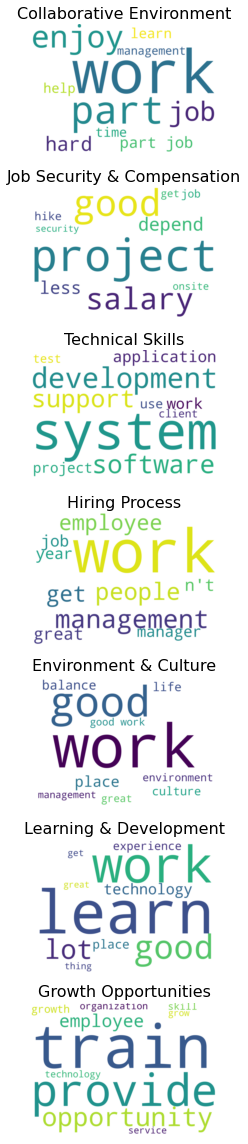

In [58]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cloud = WordCloud(background_color='white',relative_scaling=1,
                      normalize_plurals=False,
                  width=2500,
                  height=1800,
                  max_words=10,
                  
                  
                  prefer_horizontal=1.0)



fig, axes = plt.subplots(7, 1, figsize=(26,16),constrained_layout=False)

for i, ax in enumerate(axes.flatten()):
   
    fig.add_subplot(ax)
    
    
    cloud.generate_from_frequencies(lda_topic_words[i], max_font_size=800)
    plt.gca().imshow(cloud,interpolation='bilinear')
    plt.gca().set_title(topics_title[i], fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.subplots_adjust( wspace=20, hspace=3)
plt.tight_layout()
plt.show()

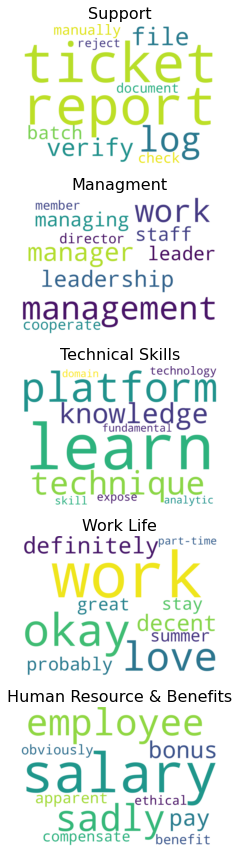

In [60]:
abae_topic_names = {0:"Support",1:"Managment",2:"Technical Skills",3:"Work Life",4:"Human Resource & Benefits"}
fig, axes = plt.subplots(5, 1, figsize=(20,12),constrained_layout=False)

for i, ax in enumerate(axes.flatten()):
   
    fig.add_subplot(ax)
    
    
    cloud.generate_from_frequencies(abae_topic_word[i], max_font_size=800)
    plt.gca().imshow(cloud,interpolation='bilinear')
    plt.gca().set_title(abae_topic_names[i], fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.subplots_adjust( wspace=20, hspace=3)
plt.tight_layout()
plt.show()

In [ ]:
test = 'this be a great place to work grow and advance your career wide range of opportunity and place to live and work across the u and the globe good environment to work'